# Module 02

**Exercise 2a/b**

In [1]:
house = {
    "living": {
        "exits": {"north": "kitchen", "outside": "garden", "upstairs": "bedroom"},
        "people": ["James"],
        "capacity": 2,
    },
    "kitchen": {"exits": {"south": "living"}, "people": [], "capacity": 1},
    "garden": {"exits": {"inside": "living"}, "people": ["Sue"], "capacity": 3},
    "bedroom": {
        "exits": {"downstairs": "living", "jump": "garden"},
        "people": [],
        "capacity": 1,
    },
}

**Answer 2a**

We can get a simpler dictionary with just capacities like this:

In [2]:
{name: room['capacity'] for name, room in house.items()}

{'living': 2, 'kitchen': 1, 'garden': 3, 'bedroom': 1}

**Answer 2b**

To get the current number of occupants, we can use a similar dictionary comprehension. Remember that we can *filter* (only keep certain rooms) by adding an `if` clause:

In [3]:
{name: len(room["people"]) for name, room in house.items() if len(room["people"]) > 0}

{'living': 1, 'garden': 1}

**Answer 2c**

Things to notice here: 

1.99999 doesn't round, even if you did ```int(1.9999999)``` you would get 1.

```round(1.9999999)``` or  ```int(1.9999999999999999)``` would give you 2

Strings aren't integers

Even though 20 and 5 are integers and they divide to give 4, the result is a float, not an int. 
Floor division (```20 // 5```) will return an integer.

'10.' is a float not an integer

Can do this in one line using comprehension or could make an empty list and append to it.

In [4]:
def example_funct(*args):
    op = [a for a in args if type(a)== int and a%2 == 0]
    return op

example_funct(1, 1.99999999999, "three", 20/5, 5, 6, "sju", "8", 9, 10., 11, 12)

[6, 12]

**Answer 2d**

Will have to import libraries.

Can use ```dir(X)``` to list the attributes of the modules

There will be some depreciation warnings from scipy instructing users to go use numpy or numpy.lib (which can also be investigated via ```dir(np.lib)``` 

Statistics will return the mean as an integer whereas numpy and scipy will return a float.

All return the same value of pi.

scipy returns a complex number for the negative log example with an imaginary part of pi.

log(+ive) using +12.01 as an example

log(-ive) using -11.99 as an example

| Module | pi| log(+ive) | log(-ive)| mean|
| :-------|:-------------:|:-----:|:-----:|:-----:|
|numpy|3.14159...|2.48573...|nan|5.0|
|scipy|3.14159...|2.48573...|(2.48407... + 3.14159...j)|5.0|
|math|3.14159...|2.48573...|math domain error|§|
|statistics|§|2.48573...|math domain error|5|

§ module doesn't have method

**Answer 2e**

Broad range of options, this is simply one of the possibilities given in the original notebook with the inclusion of some typehinting and descriptions of methods/classes

Note. For more information on type annotations, look into [Module 7.2](https://alan-turing-institute.github.io/rse-course/html/module07_construction_and_design/07_02_coding_conventions.html#type-annotations)

In [5]:
import typing
class Maze:
    """
    Here we can put a description of the class
    """
    def __init__(self, name: str): 
        # We can also use typehints to signal what type a variable should be
        # In this case the name of the maze would be a string.
        self.name = name
        self.rooms = {}

    def add_room(self, room):
        room.maze = self  # The Room needs to know which Maze it is a part of
        self.rooms[room.name] = room # This means that we expect our Rooms class to have a 'name' property

    def occupants(self):
        """
        Return a list containing the occupants of the maze
        """
        return [occupant for room in self.rooms.values() for occupant in room.occupants.values()]
        
    
    def wander(self):
        """Move all the people in a random direction"""
        for occupant in self.occupants():
            occupant.wander()
    
    def describe(self):
        for room in self.rooms.values():
            room.describe()
    
    def step(self):
        self.describe()
        print("")
        self.wander()
        print("")

    def simulate(self, steps):
        for _ in range(steps):
            self.step()
            

            
class Room:
    def __init__(self, name: str, exits: dict, capacity: int, maze=None):
        self.maze = maze
        self.name = name
        self.occupants = {}  # Note the default argument, occupants start empty
        self.exits = exits  # Should be a dictionary from directions to room names
        self.capacity = capacity

    def has_space(self) -> bool:
        """
        Check if the room has space and return a boolean (True/False)
        """
        return len(self.occupants) < self.capacity

    def available_exits(self) -> typing.List[str]:
        return [
            exit
            for exit, target in self.exits.items()
            if self.maze.rooms[target].has_space()
        ]

    def random_valid_exit(self):
        import random

        if not self.available_exits():
            return None
        return random.choice(self.available_exits())

    def destination(self, exit):
        return self.maze.rooms[self.exits[exit]]

    def add_occupant(self, occupant):
        occupant.room = self  # The person needs to know which room it is in
        self.occupants[occupant.name] = occupant

    def delete_occupant(self, occupant):
        del self.occupants[occupant.name]

    def describe(self):
        if self.occupants:
            print(f"{self.name}: " + " ".join(self.occupants.keys()))

            
class Person:
    def __init__(self, name: str, room=None):
        self.name = name

    def use(self, exit):
        self.room.delete_occupant(self)
        destination = self.room.destination(exit)
        destination.add_occupant(self)
        print(
            "{some} goes {action} to the {where}".format(
                some=self.name, action=exit, where=destination.name
            )
        )

    def wander(self):
        exit = self.room.random_valid_exit()
        if exit:
            self.use(exit)

In [6]:
james = Person("James")
sue = Person("Sue")
bob = Person("Bob")
clare = Person("Clare")

living = Room("livingroom", {"outside": "garden", "upstairs": "bedroom", "north": "kitchen"}, 2)
kitchen = Room("kitchen", {"south": "livingroom"}, 1)
garden = Room("garden", {"inside": "livingroom"}, 3)
bedroom = Room("bedroom", {"jump": "garden", "downstairs": "livingroom"}, 1)

house = Maze("My House")

for room in [living, kitchen, garden, bedroom]:
    house.add_room(room)
    
living.add_occupant(james)
garden.add_occupant(sue)
garden.add_occupant(clare)
bedroom.add_occupant(bob)


In [7]:
house.simulate(3)

livingroom: James
garden: Sue Clare
bedroom: Bob

James goes outside to the garden
Sue goes inside to the livingroom
Clare goes inside to the livingroom
Bob goes jump to the garden

livingroom: Sue Clare
garden: James Bob

Sue goes north to the kitchen
Clare goes outside to the garden
James goes inside to the livingroom
Bob goes inside to the livingroom

livingroom: James Bob
kitchen: Sue
garden: Clare

James goes upstairs to the bedroom
Bob goes outside to the garden
Sue goes south to the livingroom
Clare goes inside to the livingroom



**Answer 2f**

Something along the lines of this for the original question:

In [8]:
import requests
from IPython.display import Image

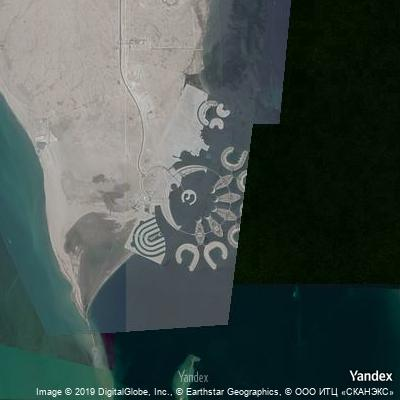

In [9]:
coordinates_as_lat_lon = [(36.2110,-115.2669),
                          (53.0066, 7.1920),
                          (41.3908, 2.1631),
                          (40.7822, -73.9653),
                          (25.8380, 50.6050)]

def op_response(lat, lon):
    response = requests.get(
    "https://static-maps.yandex.ru:443/1.x",
        params={
            "size": "400,400",  # size of map
            "ll": str(lon) + "," + str(lat),  # longitude & latitude of centre
            "z": 12,  # zoom level
            "l": "sat",  # map layer (satellite image)
            "lang": "en_US",  # language
            },
        )
    return response.content

    
op = op_response(*coordinates_as_lat_lon[4])

Image(op)

**Answer 2e**

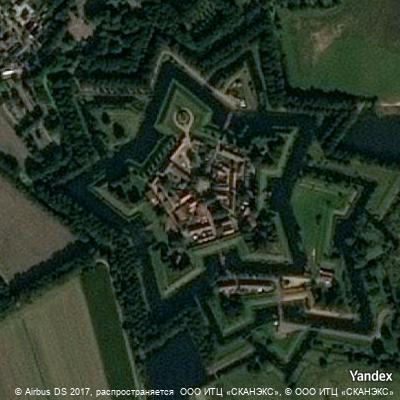

In [10]:
def extended_op_response(lat, lon, zoom=15, opfname="tmp.png"):

    response = requests.get(
    "https://static-maps.yandex.ru:443/1.x",
        params={
            "size": "400,400",  # size of map
            "ll": str(lon) + "," + str(lat),  # longitude & latitude of centre
            "z": zoom,  # zoom level
            "l": "sat",  # map layer (satellite image)
            "lang": "en_US",  # language
            },
        )
        
    with open(opfname, "wb") as png:
        png.write(response.content)


extended_op_response(*coordinates_as_lat_lon[1], zoom=16, opfname="map_picture_1.png")

Image("map_picture_1.png")